# Ride Fare Prediction Model

Problem Statement - Create a machine learning model which should be used to predict fare price for the ride for the user.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Extracting the data from dataset
df = pd.read_csv('fare_dataset.csv')

In [3]:
# Dataset overview
df.head()

,distance_km,duration_minutes,demand_index,traffic_level,weather_condition,day_of_week,hour_of_day,vehicle_type,ride_fare
0,6.24,38.2,0.96,7,Clear,Thu,12,Auto,115.67
1,14.31,71.9,1.85,3,Clear,Fri,17,Bike,184.48
2,11.25,65.0,2.68,7,Rainy,Sat,14,Bike,214.89
3,9.38,52.1,2.33,8,Clear,Tue,11,Bike,139.55
4,3.18,15.2,2.52,6,Clear,Sat,14,Auto,76.92


In [4]:
df.shape

(1000, 9)

In [5]:
df.columns

Index(['distance_km', 'duration_minutes', 'demand_index', 'traffic_level',
       'weather_condition', 'day_of_week', 'hour_of_day', 'vehicle_type',
       'ride_fare'],
      dtype='object')

Columns Info -

1. distance_km -> Distance needs to be covered to complete the ride
2. duration_minutes -> Minutes taken to complete the ride
3. demand_index -> Index for demand based on this formula:
Demand Index = Number of Available Drivers / Number of Ride Requests
4. traffic_level -> Traffic Level on the basis of below logic:
| Traffic Level | Meaning     | Typical Condition         |
| ------------- | ----------- | ------------------------- |
| 1–3           | Low traffic | Early morning, late night |
| 4–6           | Moderate    | Daytime hours             |
| 7–8           | Heavy       | Rush hours, city centers  |
| 9–10          | Severe      | Jams, blocked roads, rain |
5. weather_condition -> Weather on ride time
6. day_of_week -> Current day for the ride
7. hour_of_day -> Time in hour for the ride
8. vehicle_type -> Vehicle type booked for the ride
9. ride_fare -> Fare price for the ride

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_km        1000 non-null   float64
 1   duration_minutes   1000 non-null   float64
 2   demand_index       1000 non-null   float64
 3   traffic_level      1000 non-null   int64  
 4   weather_condition  1000 non-null   object 
 5   day_of_week        1000 non-null   object 
 6   hour_of_day        1000 non-null   int64  
 7   vehicle_type       1000 non-null   object 
 8   ride_fare          1000 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 70.4+ KB


In [7]:
df.isnull().sum()

distance_km          0
duration_minutes     0
demand_index         0
traffic_level        0
weather_condition    0
day_of_week          0
hour_of_day          0
vehicle_type         0
ride_fare            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Finding - Column Name, # of Values, Distinct # of Values, Column DataType
for column in df.columns:
    print(column," --> ",df[column].count()," --> ",df[column].nunique()," --> ",df[column].dtype)

distance_km  -->  1000  -->  727  -->  float64
duration_minutes  -->  1000  -->  572  -->  float64
demand_index  -->  1000  -->  244  -->  float64
traffic_level  -->  1000  -->  9  -->  int64
weather_condition  -->  1000  -->  3  -->  object
day_of_week  -->  1000  -->  7  -->  object
hour_of_day  -->  1000  -->  24  -->  int64
vehicle_type  -->  1000  -->  3  -->  object
ride_fare  -->  1000  -->  986  -->  float64


In [10]:
# Finding values from the string columns
for column in df.select_dtypes(include='object').columns:
    print(column," --> ",df[column].nunique()," --> ",df[column].unique())

weather_condition  -->  3  -->  ['Clear' 'Rainy' 'Stormy']
day_of_week  -->  7  -->  ['Thu' 'Fri' 'Sat' 'Tue' 'Sun' 'Wed' 'Mon']
vehicle_type  -->  3  -->  ['Auto' 'Bike' 'Car']


In [11]:
# Finding values from non string columns which have distinct count <= 50
for column in df.select_dtypes(exclude ='object').columns:
    if df[column].nunique() <= 50:
        print(column," --> ",df[column].nunique()," --> ",df[column].unique())

traffic_level  -->  9  -->  [7 3 8 6 9 4 2 5 1]
hour_of_day  -->  24  -->  [12 17 14 11 22 10 18  2  6 20 13 21 23  8  0 19 16  4  1  7 15  5  9  3]


In [12]:
df.describe()

,distance_km,duration_minutes,demand_index,traffic_level,hour_of_day,ride_fare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,7.863510,41.533200,1.767450,5.005000,12.07200,157.739420
std,4.090039,22.227442,0.730578,2.603796,7.00399,87.874117
min,1.060000,4.900000,0.510000,1.000000,0.00000,11.840000
25%,4.302500,22.075000,1.100000,3.000000,6.00000,91.590000
50%,7.955000,40.750000,1.800000,5.000000,12.00000,144.490000
75%,11.425000,59.725000,2.400000,7.000000,18.00000,208.037500
max,15.000000,93.500000,3.000000,9.000000,23.00000,532.480000


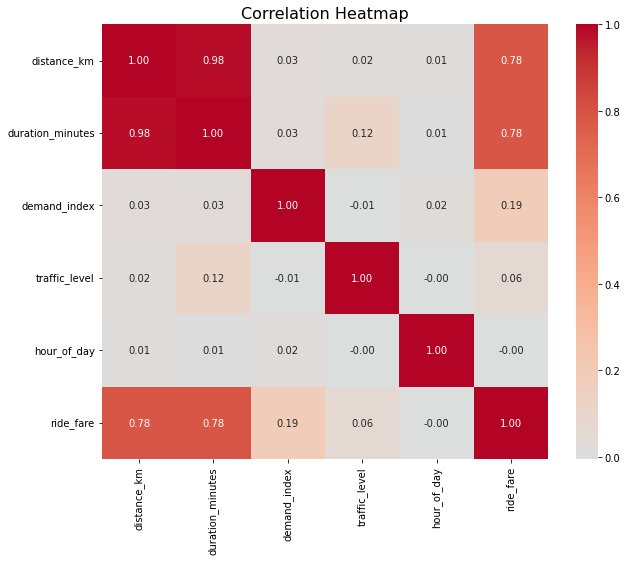

In [13]:
# finding correlation between all the fields
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [14]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col

['weather_condition', 'day_of_week', 'vehicle_type']

In [15]:
# Applying One-Hot Encoding
df = pd.get_dummies(df, columns=cat_col,drop_first=False, dtype=int)  
df

,distance_km,duration_minutes,demand_index,traffic_level,hour_of_day,ride_fare,weather_condition_Clear,weather_condition_Rainy,weather_condition_Stormy,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,vehicle_type_Auto,vehicle_type_Bike,vehicle_type_Car
0,6.24,38.2,0.96,7,12,115.67,1,0,0,0,0,0,0,1,0,0,1,0,0
1,14.31,71.9,1.85,3,17,184.48,1,0,0,1,0,0,0,0,0,0,0,1,0
2,11.25,65.0,2.68,7,14,214.89,0,1,0,0,0,1,0,0,0,0,0,1,0
3,9.38,52.1,2.33,8,11,139.55,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3.18,15.2,2.52,6,14,76.92,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.28,12.3,2.14,9,13,51.53,1,0,0,0,0,0,1,0,0,0,0,1,0
996,13.84,72.1,2.89,4,19,224.79,1,0,0,0,0,0,0,0,1,0,0,1,0
997,2.92,15.0,0.67,5,9,68.28,0,1,0,0,0,0,0,0,1,0,1,0,0
998,14.30,85.9,0.64,8,9,219.07,0,0,1,0,0,0,0,0,1,0,0,1,0


In [16]:
X = df.drop(columns=['ride_fare'])
y = df['ride_fare']

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print(X_standardized[:5])

[[-0.39714104 -0.15003381 -1.10577307  0.76657237 -0.010285    0.67184731
  -0.61742649 -0.19044535 -0.4017962  -0.36752385 -0.41678402 -0.41678402
   2.2998496  -0.40681834 -0.41181385  1.59171885 -1.03667198 -0.49843701]
 [ 1.57693255  1.3668687   0.11304919 -0.77041484  0.70395104  0.67184731
  -0.61742649 -0.19044535  2.48882394 -0.36752385 -0.41678402 -0.41678402
  -0.43481104 -0.40681834 -0.41181385 -0.62825165  0.96462528 -0.49843701]
 [ 0.82839907  1.05628629  1.24970365  0.76657237  0.27540942 -1.48843343
   1.61962601 -0.19044535 -0.4017962  -0.36752385  2.39932423 -0.41678402
  -0.43481104 -0.40681834 -0.41181385 -0.62825165  0.96462528 -0.49843701]
 [ 0.37096194  0.47563221  0.77039153  1.15081918 -0.15313221  0.67184731
  -0.61742649 -0.19044535 -0.4017962  -0.36752385 -0.41678402 -0.41678402
  -0.43481104  2.45809958 -0.41181385 -0.62825165  0.96462528 -0.49843701]
 [-1.14567452 -1.18530853  1.03058954  0.38232557  0.27540942  0.67184731
  -0.61742649 -0.19044535 -0.40179

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Mean Squared Error: 726.9564848702049
R² Score: 0.9127512561015056
Intercept: 18.713544966323184
Coefficients: [  7.90394922   1.69490506  20.92234575   0.09211589  -0.08823083
 -17.87605364  -0.77086306  18.6469167    1.75229681   0.3970279
  -0.86225975  -2.50590804   3.61973182  -1.50788881  -0.89299994
 -15.32320533 -52.11749126  67.44069659]


In [21]:
df

,distance_km,duration_minutes,demand_index,traffic_level,hour_of_day,ride_fare,weather_condition_Clear,weather_condition_Rainy,weather_condition_Stormy,day_of_week_Fri,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,vehicle_type_Auto,vehicle_type_Bike,vehicle_type_Car
0,6.24,38.2,0.96,7,12,115.67,1,0,0,0,0,0,0,1,0,0,1,0,0
1,14.31,71.9,1.85,3,17,184.48,1,0,0,1,0,0,0,0,0,0,0,1,0
2,11.25,65.0,2.68,7,14,214.89,0,1,0,0,0,1,0,0,0,0,0,1,0
3,9.38,52.1,2.33,8,11,139.55,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3.18,15.2,2.52,6,14,76.92,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.28,12.3,2.14,9,13,51.53,1,0,0,0,0,0,1,0,0,0,0,1,0
996,13.84,72.1,2.89,4,19,224.79,1,0,0,0,0,0,0,0,1,0,0,1,0
997,2.92,15.0,0.67,5,9,68.28,0,1,0,0,0,0,0,0,1,0,1,0,0
998,14.30,85.9,0.64,8,9,219.07,0,0,1,0,0,0,0,0,1,0,0,1,0


In [22]:
weather = [1,0,0]
day = [1,0,0,0,0,0,0]
vehicle = [1,0,0]
new_fare = np.array([[6.24,38.2,0.96,7,12]+weather+day+vehicle])
predicted_fare = model.predict(new_fare)
predicted_fare

C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121.00409245])

In [23]:
import joblib

joblib.dump(model, "fare_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']